# 1. Understanding the Dataset 
**First, check the structure of the dataset.**

In [2]:
import pandas as pd

train_data = pd.read_csv("./input/wine_train.csv")
test_data = pd.read_csv("./input/test.csv")

print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   fixed acidity         15000 non-null  float64
 2   volatile acidity      15000 non-null  float64
 3   citric acid           15000 non-null  float64
 4   residual sugar        15000 non-null  float64
 5   chlorides             15000 non-null  float64
 6   free sulfur dioxide   15000 non-null  float64
 7   total sulfur dioxide  15000 non-null  float64
 8   density               15000 non-null  float64
 9   pH                    15000 non-null  float64
 10  sulphates             15000 non-null  float64
 11  alcohol               15000 non-null  float64
 12  quality               15000 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 

# 2. Checking for Missing Values
**Detect any missing values in the dataset.**

In [3]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


# 3. Summary Statistics
**Generate descriptive statistics to understand numerical data distributions.**

In [4]:
print(train_data.describe())

                 id  fixed acidity  volatile acidity   citric acid  \
count  15000.000000   15000.000000      15000.000000  15000.000000   
mean    7499.500000       8.150753          0.504877      0.232211   
std     4330.271354       1.420983          0.135287      0.176862   
min        0.000000       4.000000          0.180000      0.000000   
25%     3749.750000       7.200000          0.400000      0.050000   
50%     7499.500000       7.800000          0.500000      0.240000   
75%    11249.250000       8.900000          0.600000      0.380000   
max    14999.000000      37.000000          1.340000      0.760000   

       residual sugar     chlorides  free sulfur dioxide  \
count    15000.000000  15000.000000         15000.000000   
mean         2.199445      0.078960            13.227133   
std          0.533989      0.015611             7.899479   
min          1.100000      0.000000             1.000000   
25%          1.900000      0.073000             6.000000   
50%      

# 4. Visualizing Data Distributions
**Histogram of Features**

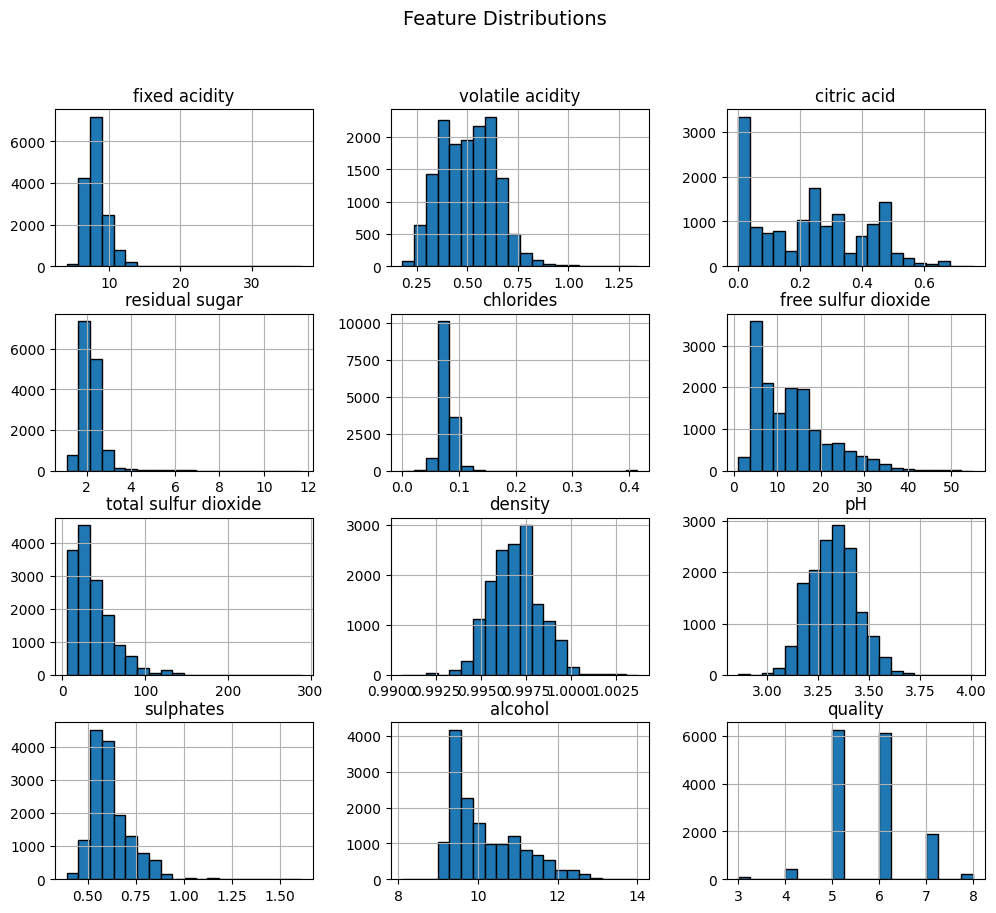

In [5]:
import matplotlib.pyplot as plt

# Plot histograms for all features
train_data.drop(columns=["id"]).hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

# 5. Distribution of Wine Quality
**Visualizing the wine quality distribution.**

C:\Users\PC\AppData\Local\Temp\ipykernel_2820\1156899767.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="quality", data=train_data, palette="viridis")


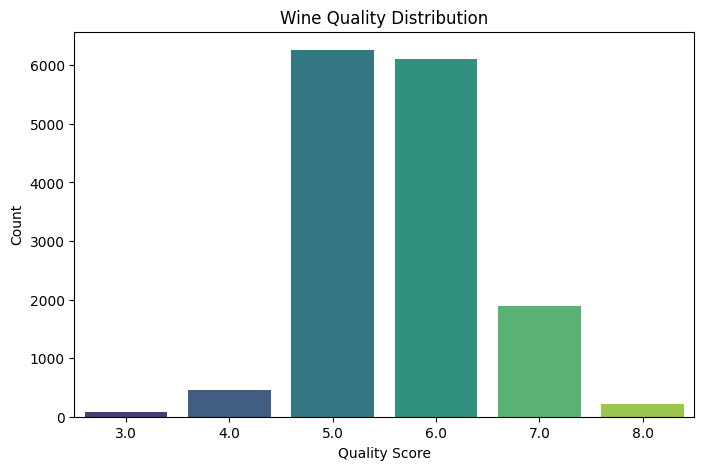

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x="quality", data=train_data, palette="viridis")
plt.title("Wine Quality Distribution")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()


# 6. Feature Correlation
**Find correlations between numerical features.**

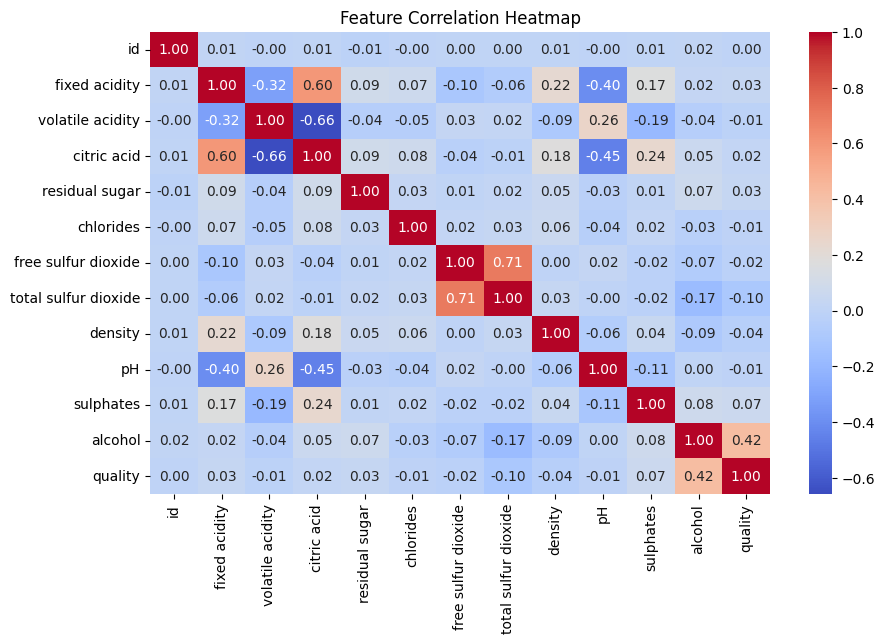

In [7]:
plt.figure(figsize=(10, 6))
numeric_data = train_data.select_dtypes(include=["number"])
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 7. Boxplots to Identify Outliers
**Detect outliers in price based on categorical features.**

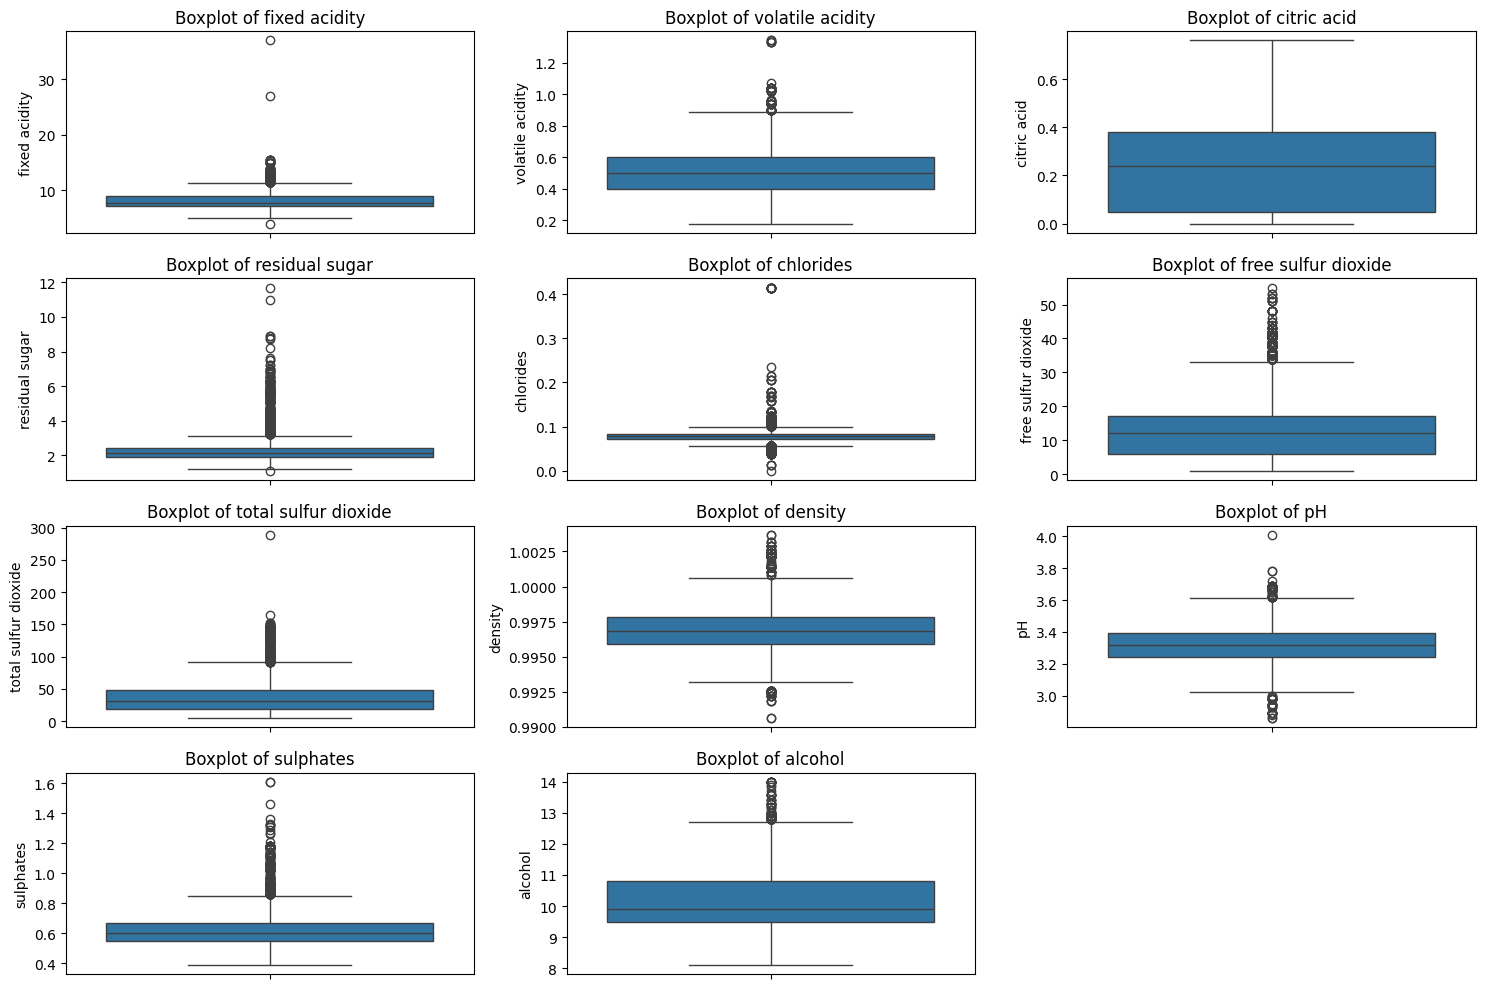

In [8]:
# Boxplot for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(train_data.columns[1:-1]):  # Exclude 'id' and 'quality'
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=train_data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# 8. Separate features (X) and target variable (y)

In [9]:
X = train_data.drop(columns=["id", "quality"])
y = train_data["quality"]

# 9. Split Data into Training and Validation Sets
**80% data for training, 20% for validation**

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 10. Train LGBMRegressor Model

In [11]:
from lightgbm import LGBMRegressor

model = LGBMRegressor(
    n_estimators=100,   # Number of boosting rounds (trees)
    learning_rate=0.1,  # Step size
    max_depth=-1,       # No depth limit
    num_leaves=31,      # Controls tree complexity
    boosting_type="gbdt",  # Gradient Boosting Decision Trees
    n_jobs=-1  # Use all CPU cores
)

# Train the model on the training subset
model.fit(X_train, y_train)

val_predictions = model.predict(X_val)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002917 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 11
[LightGBM] [Info] Start training from score 5.664333


# 11. Evaluate Model Accuracy

In [12]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_val, val_predictions) ** 0.5
print(f"Validation RMSE: {rmse:.4f}")

Validation RMSE: 0.7305


# 12. Visualize Accuracy With Graphs

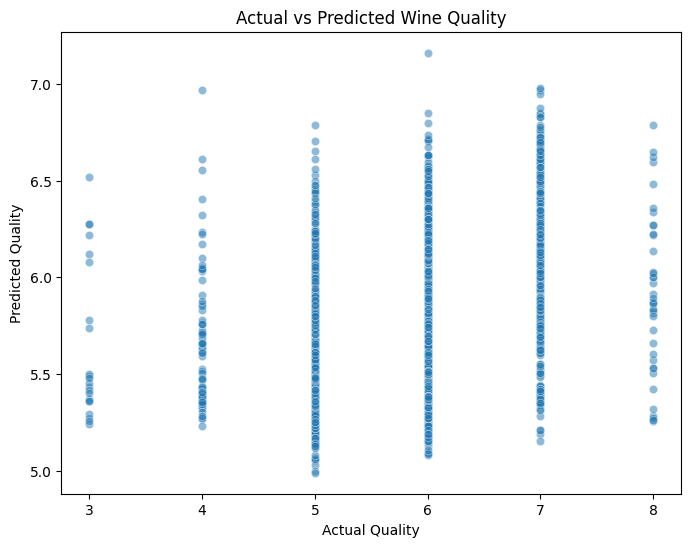

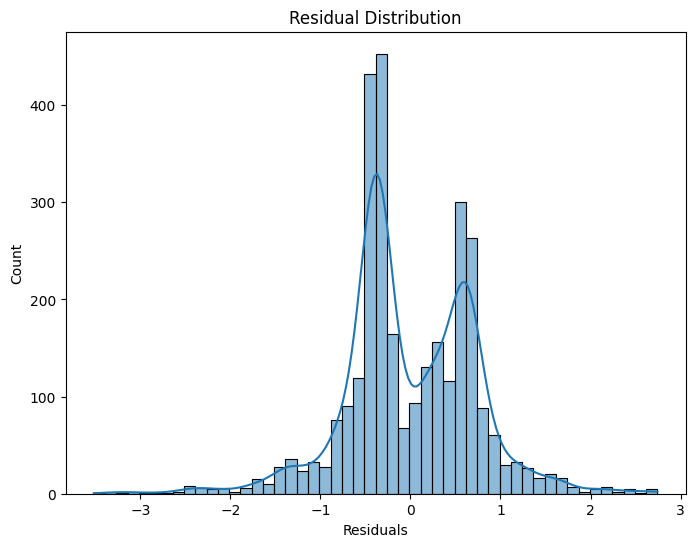

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=val_predictions, alpha=0.5)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality")
plt.show()

# Plot residuals (errors)
residuals = y_val - val_predictions
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()

# 13. Make predictions on Test Dat

In [14]:
import joblib

model.fit(X, y)

model_filename = "wine_quality_model.pkl"
joblib.dump(model, model_filename)
print(f"Model saved as {model_filename}")

# Drop the 'id' column from the test data
X_test = test_data.drop(columns=['id'])

# Make predictions on the test dataset
test_predictions = model.predict(X_test)

# Create submission DataFrame

data = {
    "id": test_data["id"],
    "quality": test_predictions
}

submission = pd.DataFrame(data)

# submission["quality"] = submission["quality"].apply(round)

submission["quality"] = submission["quality"].apply(lambda x: f"{round(x):.1f}")
submission["quality"] = submission["quality"].astype(float)  # Convert back to float if needed

# Save the submission file
submission.to_csv("submission.csv", index=False)
print("submission.csv file has been saved successfully!")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004823 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 984
[LightGBM] [Info] Number of data points in the train set: 15000, number of used features: 11
[LightGBM] [Info] Start training from score 5.660533
Model saved as wine_quality_model.pkl
submission.csv file has been saved successfully!
